In [1]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import re
from nltk.tokenize import WordPunctTokenizer
#cols = ['sentiment','id','date','query_string','user','body']
#df = pd.read_csv("training.1600000.processed.noemoticon.csv",header=None, names=cols, encoding = 'latin-1')
# above line will be different depending on where you saved your data, and your file name
#df.head()

,sentiment,id,date,query_string,user,body
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [2]:
def dataFrameCreator(file):
    df2 = pd.read_csv(file, encoding = 'latin-1')
    df2.drop(['id','keyword','handle','replies', 'retweets', 'likes'],axis=1,inplace=True)
    return df2

In [4]:
snapchat = dataFrameCreator("convertcsv.csv")

In [5]:
snapchat.head()

,body,date_tweeted
0,Snapchat so worthless now,2018-07-24T04:01:00.000Z
1,snapchatâs lame just text me,2018-07-24T04:12:37.000Z
2,if your bff doesnât share her/his location w...,2018-07-24T04:14:42.000Z
3,"Doing shit for Twitter, Instagram, Snapchat, o...",2018-07-24T04:19:46.000Z
4,your mcm typed out âViolence isnât the ans...,2018-07-24T04:23:22.000Z


In [6]:
df.drop(['id','date','query_string','user'],axis=1,inplace=True)

In [7]:
df[df.sentiment == 0].head(10)

,sentiment,body
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."
5,0,@Kwesidei not the whole crew
6,0,Need a hug
7,0,@LOLTrish hey long time no see! Yes.. Rains a...
8,0,@Tatiana_K nope they didn't have it
9,0,@twittera que me muera ?


In [8]:
df[df.sentiment == 4].head(10)

,sentiment,body
800000,4,I LOVE @Health4UandPets u guys r the best!!
800001,4,im meeting up with one of my besties tonight! ...
800002,4,"@DaRealSunisaKim Thanks for the Twitter add, S..."
800003,4,Being sick can be really cheap when it hurts t...
800004,4,@LovesBrooklyn2 he has that effect on everyone
800005,4,@ProductOfFear You can tell him that I just bu...
800006,4,@r_keith_hill Thans for your response. Ihad al...
800007,4,"@KeepinUpWKris I am so jealous, hope you had a..."
800008,4,"@tommcfly ah, congrats mr fletcher for finally..."
800009,4,@e4VoIP I RESPONDED Stupid cat is helping me ...


In [9]:
from pprint import pprint
def preClean(df):
    df['pre_clean_len'] = [len(t) for t in df.body]
    data_dict = {
        'body':{
            'type':df.body.dtype,
            'description':'tweet body'
        },
        'pre_clean_len':{
            'type':df.pre_clean_len.dtype,
            'description':'Length of the tweet before cleaning'
        },
        'dataset_shape':df.shape
    }
    pprint(data_dict)

In [10]:
preClean(df)

{'body': {'description': 'tweet body', 'type': dtype('O')},
 'dataset_shape': (1600000, 3),
 'pre_clean_len': {'description': 'Length of the tweet before cleaning',
                   'type': dtype('int64')}}


In [11]:
preClean(snapchat)

{'body': {'description': 'tweet body', 'type': dtype('O')},
 'dataset_shape': (16894, 3),
 'pre_clean_len': {'description': 'Length of the tweet before cleaning',
                   'type': dtype('int64')}}


In [12]:
def showPlot(df):
    fig, ax = plt.subplots(figsize=(5, 5))
    plt.boxplot(df.pre_clean_len)
    return plt.show()

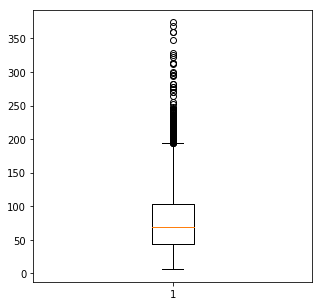

In [13]:
showPlot(df)

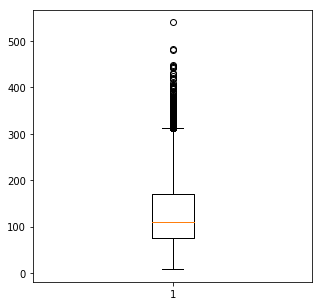

In [14]:
showPlot(snapchat)

In [31]:
tok = WordPunctTokenizer()
pat1 = r'@[A-Za-z0-9_]+'
pat2 = r'https?://[^ ]+'
combined_pat = r'|'.join((pat1, pat2))
www_pat = r'www.[^ ]+'
negations_dic = {"isn't":"is not", "aren't":"are not", "wasn't":"was not", "weren't":"were not",
                "haven't":"have not","hasn't":"has not","hadn't":"had not","won't":"will not",
                "wouldn't":"would not", "don't":"do not", "doesn't":"does not","didn't":"did not",
                "can't":"can not","couldn't":"could not","shouldn't":"should not","mightn't":"might not",
                "mustn't":"must not"}
neg_pattern = re.compile(r'\b(' + '|'.join(negations_dic.keys()) + r')\b')

def tweet_cleaner(body):
    soup = BeautifulSoup(body, 'lxml')
    souped = soup.get_text()
    try:
        bom_removed = souped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        bom_removed = souped
    stripped = re.sub(combined_pat, '', bom_removed)
    stripped = re.sub(www_pat, '', stripped)
    lower_case = stripped.lower()
    neg_handled = neg_pattern.sub(lambda x: negations_dic[x.group()], lower_case)
    letters_only = re.sub("[^a-zA-Z]", " ", neg_handled)
    words = [x for x  in tok.tokenize(letters_only) if len(x) > 1]
    return (" ".join(words)).strip()

In [32]:
def tweetDataCleaner(df):
    nums = [0,len(df)]
    print ("Cleaning and parsing the tweets...\n")
    clean_tweet_texts = []
    for i in range(nums[0],nums[1]):
        if( (i+1)%10000 == 0 ):
            print("Tweets %d of %d has been processed" % ( i+1, nums[1] ))                                                                    
        clean_tweet_texts.append(tweet_cleaner(df['body'][i]))
    return clean_tweet_texts

In [33]:
def cleanDF(name):
    clean_df = pd.DataFrame(tweetDataCleaner(name),columns=['body'])
    clean_df['target'] = name.date_tweeted
    return clean_df

In [34]:
clean_df = cleanDF(snapchat)

Cleaning and parsing the tweets...

Tweets 10000 of 16894 has been processed


In [1]:
clean_df.head(2)

NameError: name 'clean_df' is not defined

In [36]:
clean_df.to_csv('clean_tweet2.csv',encoding='utf-8')
csv = 'clean_tweet2.csv'
my_df = pd.read_csv(csv,index_col=0)
my_df.head()

,body,target
0,snapchat so worthless now,2018-07-24T04:01:00.000Z
1,snapchat lame just text me,2018-07-24T04:12:37.000Z
2,if your bff doesn share her his location with ...,2018-07-24T04:14:42.000Z
3,doing shit for twitter instagram snapchat or f...,2018-07-24T04:19:46.000Z
4,your mcm typed out violence isn the answer on ...,2018-07-24T04:23:22.000Z


In [37]:
my_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16894 entries, 0 to 16893
Data columns (total 2 columns):
body      16894 non-null object
target    16894 non-null object
dtypes: object(2)
memory usage: 396.0+ KB


In [41]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(min_df = 1)
cvec.fit(my_df.body)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [42]:
len(cvec.get_feature_names())

26737

In [49]:
document_matrix = cvec.transform(my_df.body)

In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer(min_df= 1, analyzer = "word", ngram_range=(1,3))
clean_2_df = pd.read_csv("clean_data2.csv", encoding = 'latin-1')
newp = vect.fit(my_df.body)
newp=vect.transform(my_df.body)

In [ ]:
newp = vect.fit(clean_2_df.body)

In [51]:
from sklearn.svm import LinearSVC
svm_clf = LinearSVC(random_state=0) 

In [ ]:
### Best C values = {[1,10]}
### C values already tried = {[0.01, .1, 1, 10, 100, 1000]}
## 0.784 (+/-0.002) for {'C': 10}
## 0.779 (+/-0.003) for {'C': 100}
## 0.723 (+/-0.057) for {'C': 1000}
## 0.792 (+/-0.003) for {'C': 0.01}
## 0.773 (+/-0.003) for {'C': 0.001}
## 0.793 (+/-0.002) for {'C': 1}

In [58]:
%%time
svm_clf.fit(X_train_dtm, y_train)

Wall time: 9min 8s


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0)

In [59]:
from sklearn.model_selection import cross_val_score  
accuracies = cross_val_score(estimator = svm_clf, X = X_train_dtm, y = y_train, cv = 10)
accuracies.mean()

0.7926682439097356

In [60]:
y_pred_svm = svm_clf.predict(X_test_dtm)

In [74]:
svm_clf.predict(new_P)

ValueError: X has 389946 features per sample; expecting 239090

In [61]:
from sklearn import metrics  
metrics.accuracy_score(y_test, y_pred_svm)

0.793424789651512

In [62]:
import pickle
filename = 'twitterSentimentM1.sav'
pickle.dump(svm_clf, open(filename, 'wb'))

In [57]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB(alpha = 10)

In [ ]:
nb.fit(X_train_dtm, y_train)

In [ ]:
from sklearn.model_selection import cross_val_score  
accuracies = cross_val_score(estimator = nb, X = X_train_dtm, y = y_train, cv = 10)
accuracies.mean() 

In [ ]:
y_pred_nb = nb.predict(X_test_dtm)

In [ ]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_nb)